# Context 
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Importing the Library

In [ ]:
import pandas as pd
import numpy as np


Loading the Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/heart Failure.csv")

Checking The Head and tail of dataset

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


# Attribute Information


1.   Age: age of the patient [years]

2. Sex: sex of the patient [M: Male, F: Female]

3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]



In [ ]:
print("This Dataset has {} Rows and {} Columns".format(df.shape[0],df.shape[1]))

This Dataset has 918 Rows and 12 Columns


Checking For Missing or Null value

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing Value in this Dataset

Checking for unique values for each feature

In [ ]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


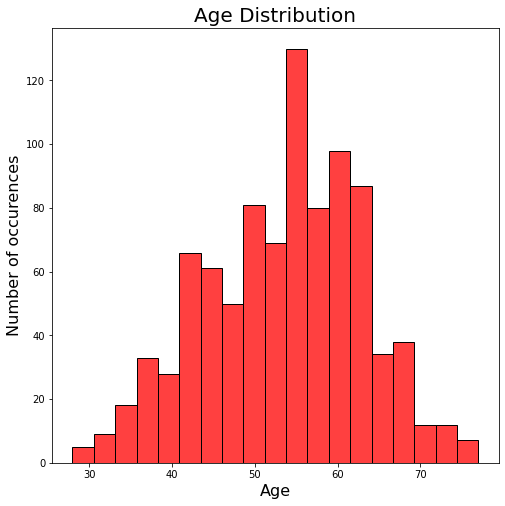

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.title("Age Distribution", fontsize = 20)
plt.xlabel("Age", fontsize = 16)
plt.ylabel("Number of occurences", fontsize = 16)
sns.histplot(df["Age"], color = "red")
plt.show()

Dealing with Categorical Feature

In [ ]:
df = df.replace("M", 0)
df = df.replace("F", 1)


In [ ]:
df["ChestPainType"] = df["ChestPainType"].astype(str)
df["RestingECG"] = df["RestingECG"].astype(str)
df["ExerciseAngina"] = df["ExerciseAngina"].astype(str)
df["ST_Slope"] = df["ST_Slope"].astype(str)


In [ ]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
df["ChestPainType"] = label.fit_transform(df["ChestPainType"])
df["RestingECG"] = label.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = label.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = label.fit_transform(df["ST_Slope"])


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0


Splitiing The Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["HeartDisease"], axis = 1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Gaussian NB Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelgb = GaussianNB()
modelgb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
train_accuracy_gb=modelgb.score(X_train,y_train)
print("Train Accuracy with GaussianNB : ",round(train_accuracy_gb*100,2))

Train Accuracy with GaussianNB :  85.83


In [ ]:
test_accuracy_gb=modelgb.score(X_test,y_test)
print("Test Accuracy with GaussianNB : ",round(test_accuracy_gb*100,2))

Test Accuracy with GaussianNB :  84.78


Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

modellr = LogisticRegression()
modellr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
train_accuracy_lr=modellr.score(X_train,y_train)
print("Train Accuracy with Logistic Regression : ",round(train_accuracy_lr*100,2))

Train Accuracy with Logistic Regression :  85.83


In [ ]:
test_accuracy_lr=modellr.score(X_test,y_test)
print("Test Accuracy with Logistic Regression : ",round(test_accuracy_lr*100,2))

Test Accuracy with Logistic Regression :  83.15


XGB Classifier Model

In [ ]:
from xgboost import XGBClassifier
modelxgb=XGBClassifier()
modelxgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
train_accuracy_xgb=modelxgb.score(X_train,y_train)
print("Train Accuracy with XGB Classifier: ",round(train_accuracy_xgb*100,2))


Train Accuracy with XGB Classifier:  93.73


In [ ]:
test_accuracy_xgb=modelxgb.score(X_test,y_test)
print("Test Accuracy with XGB Classifier: ",round(test_accuracy_xgb*100,2))

Test Accuracy with XGB Classifier:  87.5
